# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 581


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url ="https://api.openweathermap.org/data/2.5/weather?"
unit="imperial"

# Build query URL and request your results in F
query_url =  url + "appid=" + weather_api_key + "&q=" + city+ "&units=" + unit

In [4]:
print(requests.get(query_url))

<Response [200]>


In [5]:
# Retrieving data and converting it into JSON
weather_response = requests.get(query_url)
weather_json = weather_response.json()
weather_json

{'coord': {'lon': 80.3833, 'lat': 52.0333},
 'weather': [{'id': 801,
   'main': 'Clouds',
   'description': 'few clouds',
   'icon': '02n'}],
 'base': 'stations',
 'main': {'temp': -12.01,
  'feels_like': -24.61,
  'temp_min': -12.01,
  'temp_max': -12.01,
  'pressure': 1037,
  'humidity': 88},
 'visibility': 10000,
 'wind': {'speed': 11.99, 'deg': 10, 'gust': 25.99},
 'clouds': {'all': 22},
 'dt': 1702340164,
 'sys': {'type': 2,
  'id': 2088313,
  'country': 'RU',
  'sunrise': 1702348628,
  'sunset': 1702376812},
 'timezone': 25200,
 'id': 1486983,
 'name': 'Volchikha',
 'cod': 200}

In [6]:

# Set the API base URL
unit="imperial"
url=f"https://api.openweathermap.org/data/2.5/weather?units=imperial&appid={weather_api_key}"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date =  city_weather['dt']

# Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | crane
Processing Record 3 of Set 1 | vilyuchinsk
Processing Record 4 of Set 1 | edinburgh of the seven seas
Processing Record 5 of Set 1 | porto novo
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | badger
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | taiohae
City not found. Skipping...
Processing Record 10 of Set 1 | barrouallie
Processing Record 11 of Set 1 | khorixas
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | bardai
Processing Record 14 of Set 1 | waitangi
Processing Record 15 of Set 1 | fort bragg
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | khandyga
Processing Record 18 of Set 1 | lebu
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | kingston
Processing Record 21 of Set 1 | tolanaro
Processing Record 22 of Set 1 

In [7]:
city_data

[{'City': 'punta arenas',
  'Lat': -53.15,
  'Lng': -70.9167,
  'Max Temp': 53.11,
  'Humidity': 46,
  'Cloudiness': 77,
  'Wind Speed': 17.38,
  'Country': 'CL',
  'Date': 1702339931},
 {'City': 'crane',
  'Lat': 31.3974,
  'Lng': -102.3501,
  'Max Temp': 56.5,
  'Humidity': 20,
  'Cloudiness': 14,
  'Wind Speed': 7.65,
  'Country': 'US',
  'Date': 1702340178},
 {'City': 'vilyuchinsk',
  'Lat': 52.9306,
  'Lng': 158.4028,
  'Max Temp': 21.47,
  'Humidity': 84,
  'Cloudiness': 24,
  'Wind Speed': 6.69,
  'Country': 'RU',
  'Date': 1702340179},
 {'City': 'edinburgh of the seven seas',
  'Lat': -37.0676,
  'Lng': -12.3116,
  'Max Temp': 57,
  'Humidity': 90,
  'Cloudiness': 100,
  'Wind Speed': 21.88,
  'Country': 'SH',
  'Date': 1702340180},
 {'City': 'porto novo',
  'Lat': 6.4965,
  'Lng': 2.6036,
  'Max Temp': 79.81,
  'Humidity': 81,
  'Cloudiness': 57,
  'Wind Speed': 4.97,
  'Country': 'BJ',
  'Date': 1702340181},
 {'City': 'grytviken',
  'Lat': -54.2811,
  'Lng': -36.5092,
  'Max 

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
#city_data_df
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [9]:
# Display sample data
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,53.11,46,77,17.38,CL,1702339931
1,crane,31.3974,-102.3501,56.50,20,14,7.65,US,1702340178
2,vilyuchinsk,52.9306,158.4028,21.47,84,24,6.69,RU,1702340179
3,edinburgh of the seven seas,-37.0676,-12.3116,57.00,90,100,21.88,SH,1702340180
4,porto novo,6.4965,2.6036,79.81,81,57,4.97,BJ,1702340181
5,grytviken,-54.2811,-36.5092,35.02,78,27,9.44,GS,1702340182
6,badger,64.8000,-147.5333,21.07,86,100,10.36,US,1702340076
7,st. john's,47.5649,-52.7093,54.79,94,20,27.63,CA,1702340184
8,barrouallie,13.2333,-61.2667,78.42,83,40,14.97,VC,1702340186
9,khorixas,-20.3667,14.9667,69.31,43,36,4.29,NA,1702340187


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")



In [11]:
# Read saved data
city_data_df_ = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,punta arenas,-53.1500,-70.9167,53.11,46,77,17.38,CL,1702339931
1,crane,31.3974,-102.3501,56.50,20,14,7.65,US,1702340178
2,vilyuchinsk,52.9306,158.4028,21.47,84,24,6.69,RU,1702340179
3,edinburgh of the seven seas,-37.0676,-12.3116,57.00,90,100,21.88,SH,1702340180
4,porto novo,6.4965,2.6036,79.81,81,57,4.97,BJ,1702340181
5,grytviken,-54.2811,-36.5092,35.02,78,27,9.44,GS,1702340182
6,badger,64.8000,-147.5333,21.07,86,100,10.36,US,1702340076
7,st. john's,47.5649,-52.7093,54.79,94,20,27.63,CA,1702340184
8,barrouallie,13.2333,-61.2667,78.42,83,40,14.97,VC,1702340186
9,khorixas,-20.3667,14.9667,69.31,43,36,4.29,NA,1702340187


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

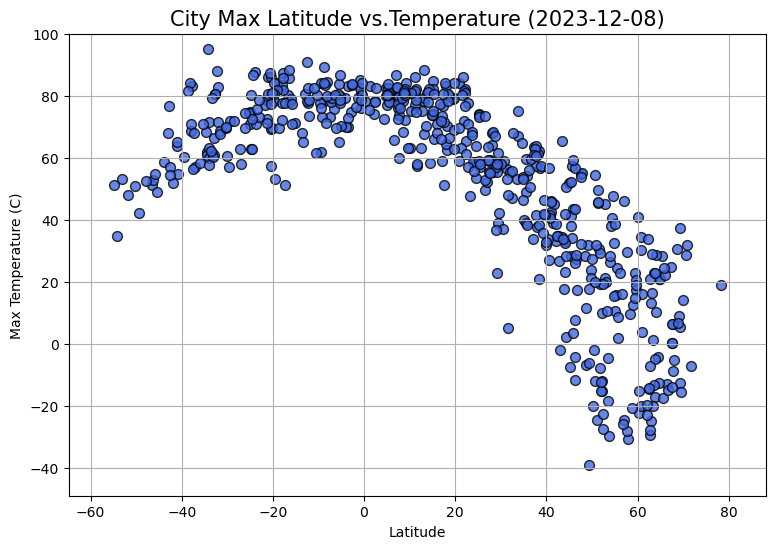

In [12]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Max Latitude vs.Temperature ({today_date})', fontsize=15)


#plt.title('City Latitude vs.Temperature ')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Max Temp'])-10, max(city_data_df['Max Temp'])+5)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig1.png")

# Show plot:
plt.show()


#### Latitude Vs. Humidity

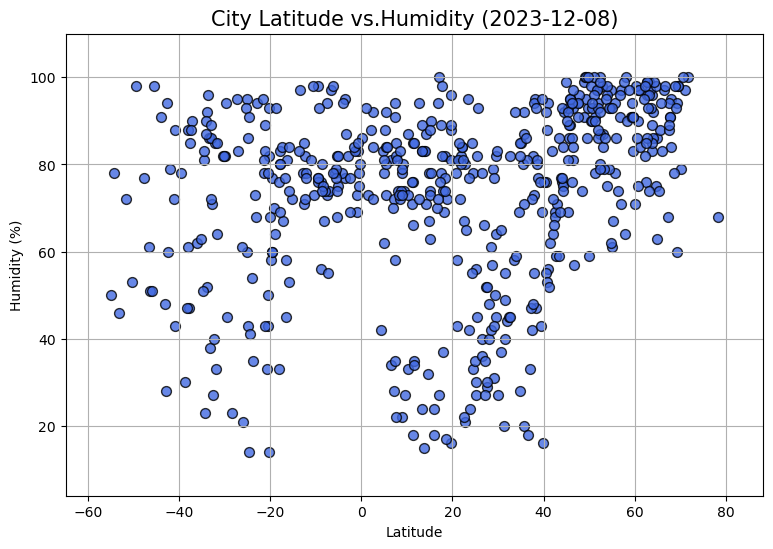

In [13]:
# Build scatter plot for latitude vs. humidity
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Latitude vs.Humidity ({today_date})', fontsize=15)
#plt.title(f"City Latitude vs. Max Temperature ({today_date})")
#plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.to_datetime('now').date()) + ')', fontsize=20)


plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Humidity'])-10, max(city_data_df['Humidity'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig2.png")

# Show plot:
plt.show()


#### Latitude Vs. Cloudiness

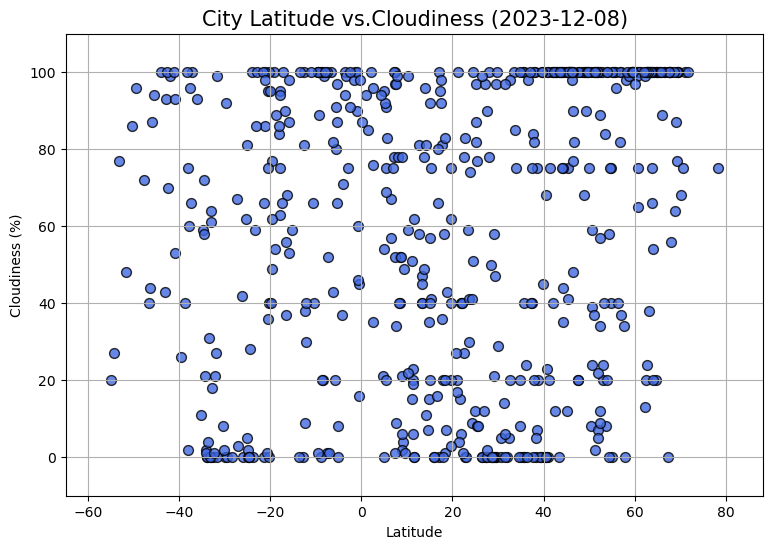

In [14]:
# Build scatter plot for latitude vs. cloudiness
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Latitude vs.Cloudiness ({today_date})', fontsize=15)
#plt.title(f"City Latitude vs. Max Temperature ({today_date})")
#plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.to_datetime('now').date()) + ')', fontsize=20)


plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Cloudiness'])-10, max(city_data_df['Cloudiness'])+10)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig3.png")

# Show plot:
plt.show()

#### Latitude vs. Wind Speed Plot

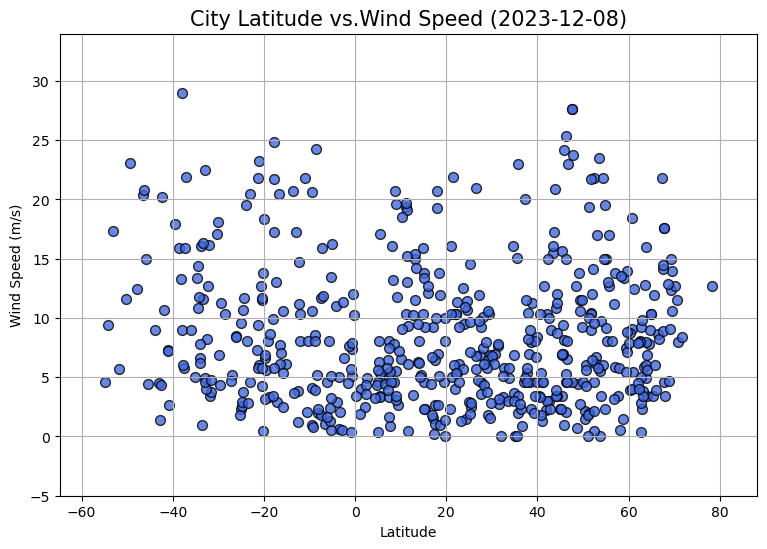

In [15]:
# Build scatter plot for latitude vs. wind speed
# YOUR CODE HERE:
plt.figure(figsize=(9,6))
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolors='black', facecolor='royalblue',s=[50],alpha=.80)

# Get today's date and format it
today_date = pd.to_datetime("2023-12-08").date().strftime('%Y-%m-%d')

# Incorporate the other graph properties:
plt.title(f'City Latitude vs.Wind Speed ({today_date})', fontsize=15)
#plt.title(f"City Latitude vs. Max Temperature ({today_date})")
#plt.title('City Latitude vs. Max Temperature ' + '(' + str(pd.to_datetime('now').date()) + ')', fontsize=20)


plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')

# Set the limits of the y axis:
plt.ylim(min(city_data_df['Wind Speed'])-5, max(city_data_df['Wind Speed'])+5)

# Set the limits of the x axis:
plt.xlim(min(city_data_df['Lat'])-10, max(city_data_df['Lat'])+10)

#set a grid
plt.grid()

# Save the figure:
plt.savefig("output_data/Fig3.png")

# Show plot:
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


###  Temperature vs. Latitude Linear Regression Plot

Nothern Hemisphere

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df_[city_data_df_['Lat'] >= 0]


# Display sample data
northern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,1,crane,31.3974,-102.3501,56.50,20,14,7.65,US,1702340178
2,2,vilyuchinsk,52.9306,158.4028,21.47,84,24,6.69,RU,1702340179
4,4,porto novo,6.4965,2.6036,79.81,81,57,4.97,BJ,1702340181
6,6,badger,64.8000,-147.5333,21.07,86,100,10.36,US,1702340076
7,7,st. john's,47.5649,-52.7093,54.79,94,20,27.63,CA,1702340184


rvalue:-0.8456081750603374


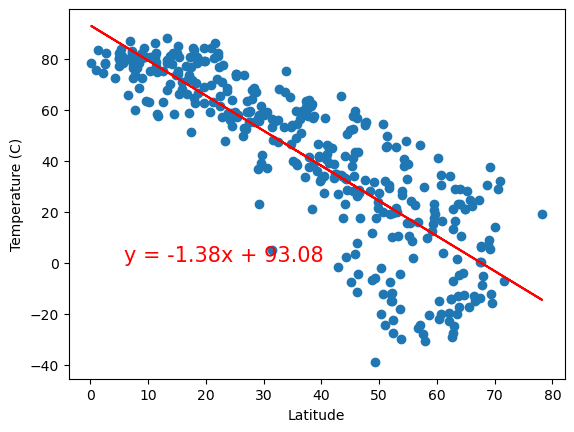

In [17]:
# Define a function to create Linear Regression plots
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"rvalue:{rvalue}")
plt.show()

Southern Hemisphere

In [18]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df_[city_data_df_['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,punta arenas,-53.1500,-70.9167,53.11,46,77,17.38,CL,1702339931
3,3,edinburgh of the seven seas,-37.0676,-12.3116,57.00,90,100,21.88,SH,1702340180
5,5,grytviken,-54.2811,-36.5092,35.02,78,27,9.44,GS,1702340182
9,9,khorixas,-20.3667,14.9667,69.31,43,36,4.29,NaN,1702340187
10,10,port-aux-francais,-49.3500,70.2167,42.33,98,96,23.06,TF,1702340188


rvalue:0.6272718119579008


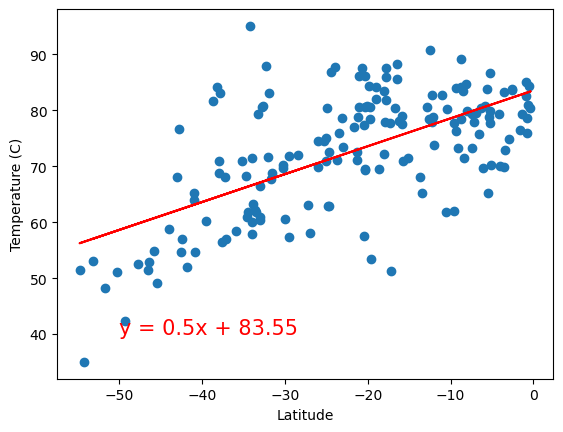

In [20]:
# Define a function to create Linear Regression plots
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature (C)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 

A negative correlation coefficient of -0.8456081750603374 in the Northern Hemisphere suggests a strong negative correlation. This means that as latitude increases, cloudiness tends to decrease significantly.

A positive correlation coefficient of 0.6272718119579008 in the Southern Hemisphere indicates a moderate positive correlation. This suggests that as latitude increases in the Southern Hemisphere, cloudiness tends to increase moderately.

### Humidity vs. Latitude Linear Regression Plot

rvalue:0.4041287495402728


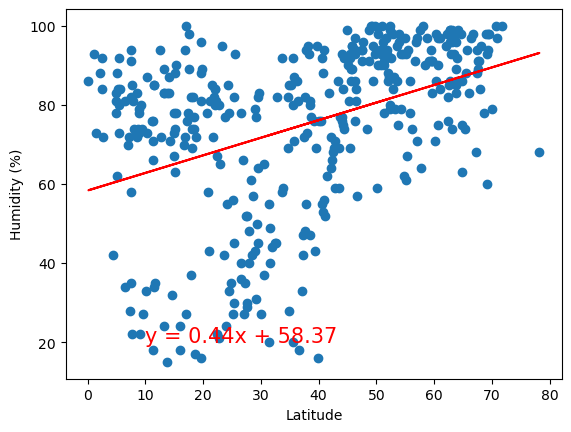

In [21]:
#Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
regress_values

# equation line
line_eq11 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq11,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"rvalue:{rvalue}")
plt.show()

rvalue:0.2367734652858535


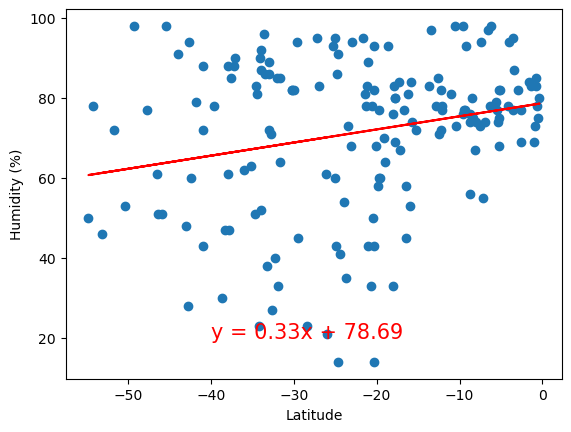

In [22]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values =southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq2 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq2,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere, where the correlation coefficient is 0.4041287495402728, it indicates a weak positive correlation. This implies that as latitude increases in the Northern Hemisphere, there is a slight tendency for the humidity to increase as well.

In the Southern Hemisphere, where the correlation coefficient is 0.2367734652858535, it also suggests a weak positive correlation. This means that as latitude increases in the Southern Hemisphere, there is a modest tendency for for the humidity to increase.

### Cloudiness vs. Latitude Linear Regression Plot

In [23]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")
print(f"rvalue:{rvalue}")
print(f"pvalue:{pvalue}")
print(f"stderr:{stderr}")

Slope:0.6344942380132027
Intercept:35.986792652370795
rvalue:0.3216539713392446
pvalue:1.1452006505263363e-10
stderr:0.09568873271085196


In [24]:
regress_values = x_values * slope + intercept
regress_values

1      55.908262
2      69.570953
4      40.108784
6      77.102019
7      66.166448
         ...    
545    65.322634
546    46.656638
547    48.469959
548    64.613333
550    69.001622
Name: Lat, Length: 383, dtype: float64

rvalue:0.3216539713392446


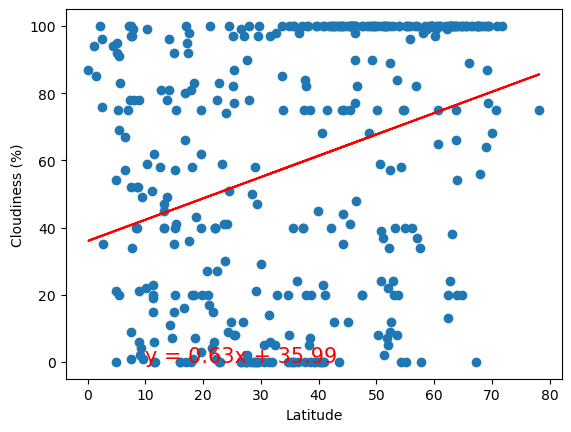

In [25]:
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"rvalue:{rvalue}")
plt.show()

In [26]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")
print(f"rvalue:{rvalue}")
print(f"pvalue:{pvalue}")
print(f"stderr:{stderr}")

Slope:0.4054441996954858
Intercept:65.75525510245464
rvalue:0.15037204506060142
pvalue:0.05170642733771182
stderr:0.2068919047655155


In [27]:
regress_values = x_values * slope + intercept
regress_values

0      44.205896
3      50.726412
5      43.747298
9      57.497695
10     45.746584
         ...    
533    52.136141
534    62.218444
537    57.095575
544    56.375993
549    55.184108
Name: Lat, Length: 168, dtype: float64

rvalue:0.15037204506060142


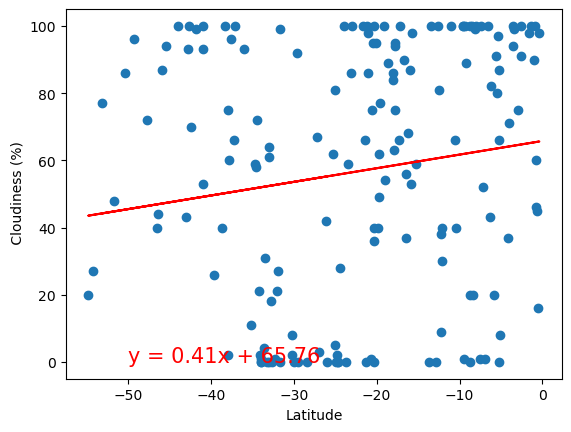

In [29]:
# equation line
line_eq7 = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq7,(-50,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel(' Cloudiness (%)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:**

In the Northern Hemisphere, where the correlation coefficient is positive 0.3216539713392446, it suggests a weak positive correlation. As latitude increases, cloudiness tends to increase slightly.

In the Southern Hemisphere, where the correlation coefficient is also positive 0.15037204506060142, it indicates a weak positive correlation. However, the correlation is weaker than in the Northern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

In [34]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(f"Slope:{slope}")
print(f"Intercept:{intercept}")
print(f"rvalue:{rvalue}")
print(f"pvalue:{pvalue}")
print(f"stderr:{stderr}")

Slope:0.033771050519028775
Intercept:6.827018943535671
rvalue:0.11887755103705612
pvalue:0.019958198450666507
stderr:0.014450791873340611


In [35]:
regress_values = x_values * slope + intercept
regress_values

1      7.887342
2      8.614541
4      7.046413
6      9.015383
7      8.433336
         ...   
545    8.388423
546    7.394923
547    7.491437
548    8.350671
550    8.584238
Name: Lat, Length: 383, dtype: float64

rvalue:0.11887755103705612


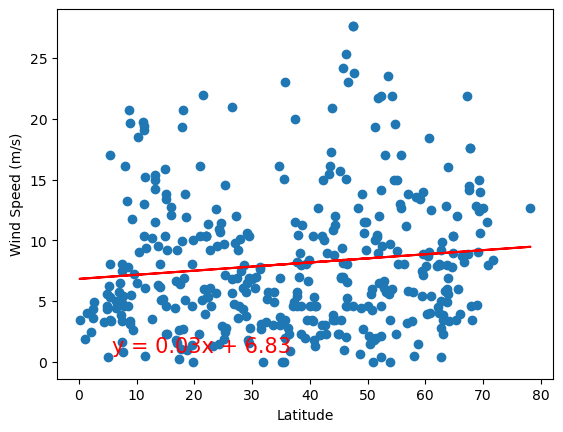

In [36]:
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"rvalue:{rvalue}")
plt.show()

rvalue:-0.2386889430221591


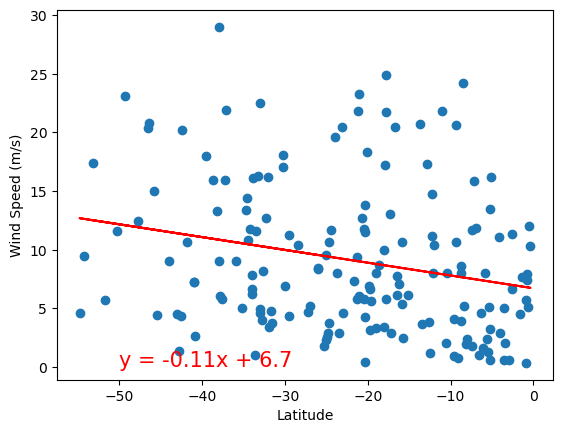

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
regress_values
# equation line
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Graph
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,0),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
print(f"rvalue:{rvalue}")
plt.show()

**Discussion about the linear relationship:**

In the Northern Hemisphere, where the correlation coefficient is positive 0.11887755103705612, it suggests a weak positive correlation. This means that as latitude increases in the Northern Hemisphere, there is a slight tendency for wind speed to increase. 

In the Southern Hemisphere, where the correlation coefficient is negative -0.2386889430221591, it suggests a weak negative correlation. This implies that as latitude increases in the Southern Hemisphere, there is a slight tendency for wind speed to decrease. 

